In [1]:
import os
import numpy as np
from glob import glob
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [7]:
x = os.listdir('images/carimage')
car_count = len(x)
x = os.listdir('images/notcar')
noncar_count = len(x)

In [13]:
y = np.array([1]*car_count + [0]*noncar_count)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [23]:
img_loc = glob('images/*/*')

In [45]:
x = []
for i in img_loc:
    a = np.asarray(Image.open(i).resize(size=(50,50)))
    x.append(a)
x = np.array(x)
x.shape

(71, 50, 50, 3)

1


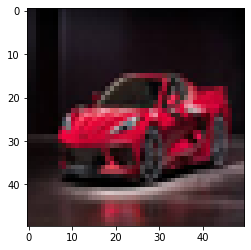

In [49]:
plt.imshow(x[0]);
print(y[0])

In [50]:
x.shape, y.shape

((71, 50, 50, 3), (71,))

In [55]:
model = tf.keras.Sequential([
    Input(shape=(50, 50, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dropout_1 (Dropout)         (None, 7744)             

In [56]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

In [59]:
model.fit(x, y, epochs=5)

Epoch 1/5
3/3 [==============================] - 0s 71ms/step - loss: 0.3038 - accuracy: 0.9296
Epoch 2/5
3/3 [==============================] - 0s 141ms/step - loss: 0.0880 - accuracy: 0.9577
Epoch 3/5
3/3 [==============================] - 0s 68ms/step - loss: 0.0985 - accuracy: 0.9577
Epoch 4/5
3/3 [==============================] - 0s 64ms/step - loss: 0.0778 - accuracy: 0.9577
Epoch 5/5
3/3 [==============================] - 0s 66ms/step - loss: 0.0665 - accuracy: 0.9718


In [60]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [63]:
model.evaluate(x, y)

3/3 [==============================] - 0s 33ms/step - loss: 0.0413 - accuracy: 1.0000


[0.0412762388586998, 1.0]